In [1]:
import pandas as pd
import numpy as np

import datetime
import csv
# pd.set_option('display.max_rows', None)

In [2]:
def nan_check(df, column):
    if df[column].isna().any():
        print(f"Column '{column}' contains NaN values.")
    else:
        print(f"Column '{column}' has no NaN values.")

In [3]:
df = pd.DataFrame([[11,22,np.nan],[21,22,23]])
df.columns=['c1','c2','c3']
df.index = ['a','b']
nan_check(df, 'c2')

Column 'c2' has no NaN values.


In [4]:
neighborhood = pd.read_csv('/Users/chenruijia/Downloads/NYC_neighborhood_census_data_2020.csv')
subway_traffic = pd.read_csv('/Users/chenruijia/Downloads/NYC_subway_traffic_2017-2021.csv')
map_df = subway_traffic[['Latitude', 'Longitude']]
subway_traffic = subway_traffic[['Datetime', 'Stop Name', 'Line', 'Neighborhood', 'Entries']].sort_values(by=['Stop Name', 'Datetime'])

# replace NaN
nan_check(subway_traffic, 'Entries')

# '''
# Normalized Volume of each station:
# (Entries + Exists)/ Total
# Total = sum of volume of each stop at the same time interval

# '''


subway_traffic

Column 'Entries' has no NaN values.


,Datetime,Stop Name,Line,Neighborhood,Entries
211,2017-02-04 08:00:00,1 Av,Canarsie,Lower East Side/Chinatown,1205.0
670,2017-02-04 12:00:00,1 Av,Canarsie,Lower East Side/Chinatown,2920.0
1133,2017-02-04 16:00:00,1 Av,Canarsie,Lower East Side/Chinatown,3880.0
1596,2017-02-04 20:00:00,1 Av,Canarsie,Lower East Side/Chinatown,3820.0
2061,2017-02-05 00:00:00,1 Av,Canarsie,Lower East Side/Chinatown,2474.0
...,...,...,...,...,...
4587505,2021-08-13 00:00:00,Zerega Av,Pelham,Parkchester/Soundview,14.0
4587972,2021-08-13 04:00:00,Zerega Av,Pelham,Parkchester/Soundview,118.0
4588439,2021-08-13 08:00:00,Zerega Av,Pelham,Parkchester/Soundview,428.0
4588906,2021-08-13 12:00:00,Zerega Av,Pelham,Parkchester/Soundview,200.0


In [5]:
subway_traffic['Datetime'] = pd.to_datetime(subway_traffic['Datetime'])
subway_traffic['Time'] = subway_traffic['Datetime'].dt.time
subway_traffic

,Datetime,Stop Name,Line,Neighborhood,Entries,Time
211,2017-02-04 08:00:00,1 Av,Canarsie,Lower East Side/Chinatown,1205.0,08:00:00
670,2017-02-04 12:00:00,1 Av,Canarsie,Lower East Side/Chinatown,2920.0,12:00:00
1133,2017-02-04 16:00:00,1 Av,Canarsie,Lower East Side/Chinatown,3880.0,16:00:00
1596,2017-02-04 20:00:00,1 Av,Canarsie,Lower East Side/Chinatown,3820.0,20:00:00
2061,2017-02-05 00:00:00,1 Av,Canarsie,Lower East Side/Chinatown,2474.0,00:00:00
...,...,...,...,...,...,...
4587505,2021-08-13 00:00:00,Zerega Av,Pelham,Parkchester/Soundview,14.0,00:00:00
4587972,2021-08-13 04:00:00,Zerega Av,Pelham,Parkchester/Soundview,118.0,04:00:00
4588439,2021-08-13 08:00:00,Zerega Av,Pelham,Parkchester/Soundview,428.0,08:00:00
4588906,2021-08-13 12:00:00,Zerega Av,Pelham,Parkchester/Soundview,200.0,12:00:00


In [76]:
average_flow = subway_traffic.groupby(['Stop Name','Line','Time'])['Entries'].mean().reset_index()

# merge average_volum to subway_traffic
average_flow.columns = ['Stop Name', 'Line', 'Time', 'Average_Flow']
subway_traffic = pd.merge(subway_traffic, average_flow, on=['Stop Name','Line', 'Time'], suffixes=('', '_avg')).sort_values(by=['Stop Name', 'Datetime'])

subway_traffic['Normalized_Flow'] = subway_traffic['Entries'] / subway_traffic['Average_Flow']

subway_traffic
subway_traffic.groupby(['Stop Name','Line','Time'])['Entries'].groups

{('1 Av', 'Canarsie', 00:00:00): [6556, 6557, 6558, 6559, 6560, 6561, 6562, 6563, 6564, 6565, 6566, 6567, 6568, 6569, 6570, 6571, 6572, 6573, 6574, 6575, 6576, 6577, 6578, 6579, 6580, 6581, 6582, 6583, 6584, 6585, 6586, 6587, 6588, 6589, 6590, 6591, 6592, 6593, 6594, 6595, 6596, 6597, 6598, 6599, 6600, 6601, 6602, 6603, 6604, 6605, 6606, 6607, 6608, 6609, 6610, 6611, 6612, 6613, 6614, 6615, 6616, 6617, 6618, 6619, 6620, 6621, 6622, 6623, 6624, 6625, 6626, 6627, 6628, 6629, 6630, 6631, 6632, 6633, 6634, 6635, 6636, 6637, 6638, 6639, 6640, 6641, 6642, 6643, 6644, 6645, 6646, 6647, 6648, 6649, 6650, 6651, 6652, 6653, 6654, 6655, ...], ('1 Av', 'Canarsie', 04:00:00): [8189, 8190, 8191, 8192, 8193, 8194, 8195, 8196, 8197, 8198, 8199, 8200, 8201, 8202, 8203, 8204, 8205, 8206, 8207, 8208, 8209, 8210, 8211, 8212, 8213, 8214, 8215, 8216, 8217, 8218, 8219, 8220, 8221, 8222, 8223, 8224, 8225, 8226, 8227, 8228, 8229, 8230, 8231, 8232, 8233, 8234, 8235, 8236, 8237, 8238, 8239, 8240, 8241, 8242, 824

In [65]:
# check Collinearity
importance_index = pd.read_excel('/Users/chenruijia/Downloads/importance_index.xlsx')
importance_index.Importance

columns = importance_index[importance_index.Importance >= 0.005].Name
# columns = pd.concat([pd.Series(["Neighborhood"]), columns], ignore_index=True)
index_df = neighborhood[columns]
# index_df

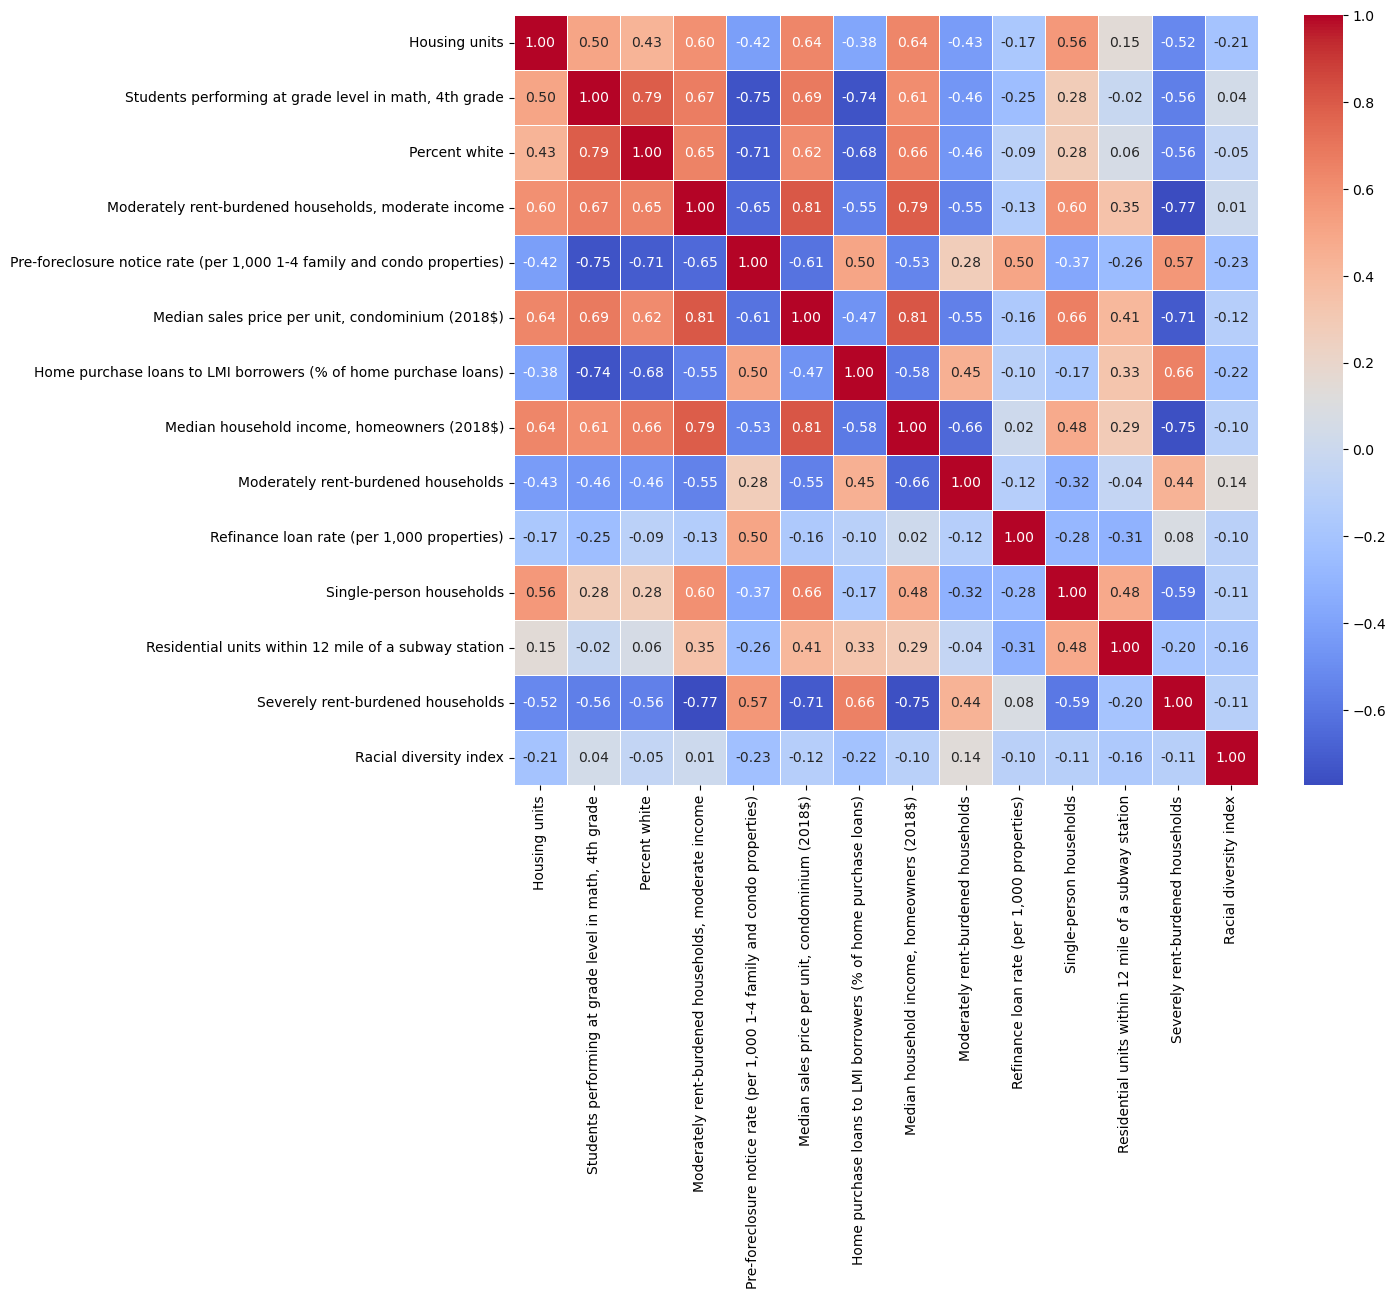


VIF:
                                             Variable        VIF
0                                       Housing units  29.421221
1   Students performing at grade level in math, 4t...  37.746398
2                                       Percent white  12.243553
3   Moderately rent-burdened households, moderate ...  16.454099
4   Pre-foreclosure notice rate (per 1,000 1-4 fam...  15.216296
5    Median sales price per unit, condominium (2018$)  14.945150
6   Home purchase loans to LMI borrowers (% of hom...  15.970829
7         Median household income, homeowners (2018$)  45.851636
8                 Moderately rent-burdened households  66.843312
9          Refinance loan rate (per 1,000 properties)  17.596370
10                           Single-person households  30.007030
11  Residential units within 12 mile of a subway s...  26.358350
12                  Severely rent-burdened households  81.573339
13                             Racial diversity index  38.062631


In [66]:
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns



# 1. Correlation Matrix
correlation_matrix = index_df.corr()
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show plot
plt.savefig('corr_14index.png')
plt.show()

# 2. VIF Calculation
X = index_df  # Drop the dependent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


# # 4. Eigenvalues
# eigenvalues = np.linalg.eigvals(correlation_matrix)
# condition_index = np.sqrt(np.max(eigenvalues) / np.min(eigenvalues))

# print("Correlation Matrix:")
# print(correlation_matrix)
print("\nVIF:")
print(vif_data)
# print("\nCondition Index:", condition_index)
# print("eigenvalues", eigenvalues)

In [67]:
# drop "Students performing at grade level in math, 4th grade", "Moderately rent-burdened households,", "Severely rent-burdened households,"
# "Median household income, homeowners (2018$)" 

columns = [
    "Housing units", 
    "Percent white",
    "Moderately rent-burdened households, moderate income",
    "Pre-foreclosure notice rate (per 1,000 1-4 family and condo properties)",
    "Median sales price per unit, condominium (2018$)",
    "Home purchase loans to LMI borrowers (% of home purchase loans)",
    "Refinance loan rate (per 1,000 properties)",
    "Single-person households",
    "Residential units within 12 mile of a subway station",
    "Racial diversity index"
]
index_df = neighborhood[columns]

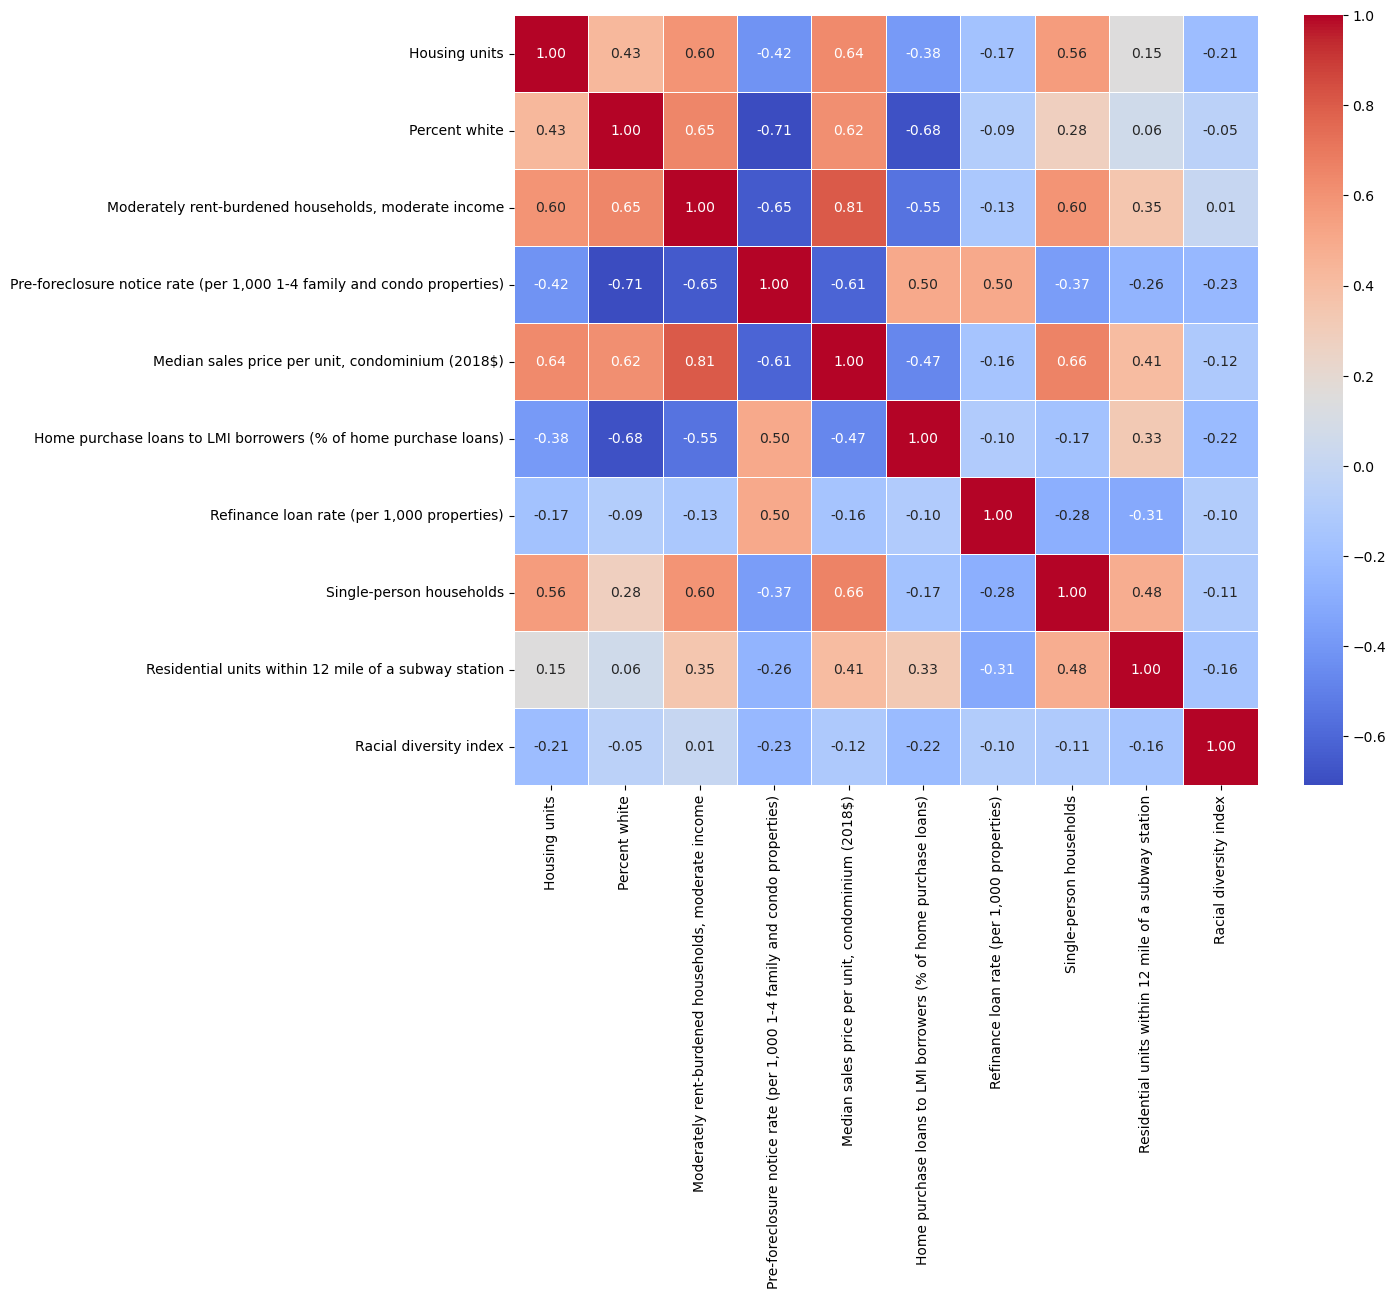


VIF:
                                            Variable        VIF
0                                      Housing units  20.415317
1                                      Percent white   7.348656
2  Moderately rent-burdened households, moderate ...  14.227573
3  Pre-foreclosure notice rate (per 1,000 1-4 fam...  12.419894
4   Median sales price per unit, condominium (2018$)  10.475608
5  Home purchase loans to LMI borrowers (% of hom...   8.737663
6         Refinance loan rate (per 1,000 properties)  15.744150
7                           Single-person households  27.124651
8  Residential units within 12 mile of a subway s...  22.232797
9                             Racial diversity index  15.266530


In [68]:


# 1. Correlation Matrix
correlation_matrix = index_df.corr()
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show plot
plt.savefig('corr_10index.png')
plt.show()

# 2. VIF Calculation
X = index_df  # Drop the dependent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


# # 4. Eigenvalues
# eigenvalues = np.linalg.eigvals(correlation_matrix)
# condition_index = np.sqrt(np.max(eigenvalues) / np.min(eigenvalues))

# print("Correlation Matrix:")
# print(correlation_matrix)
print("\nVIF:")
print(vif_data)
# print("\nCondition Index:", condition_index)
# print("eigenvalues", eigenvalues)

### Correlation Matrix:
##### High Correlation (> 0.7):

There is a high positive correlation between:
"Students performing at grade level in math, 4th grade" and "Percent white" (0.79)
"Moderately rent-burdened households, moderate income" and "Median sales price per unit, condominium (2018$)" (0.81)
"Moderately rent-burdened households" and "Severely rent-burdened households" (-0.77)



### VIF Results:

##### High VIF (> 10):
"Moderately rent-burdened households" (66.84) and "Severely rent-burdened households" (81.57) have extremely high VIF values.

"Median household income, homeowners (2018$)" also has a high VIF of 45.85.

### Recommendations:
Drop Highly Correlated Variables:

Consider dropping one variable from each highly correlated pair to reduce multicollinearity. For example:
"Students performing at grade level in math, 4th grade" or "Percent white"
"Moderately rent-burdened households, moderate income" or "Median sales price per unit, condominium (2018$)"
"Moderately rent-burdened households" or "Severely rent-burdened households"
Drop Variables with High VIF:

Consider dropping "Moderately rent-burdened households," "Severely rent-burdened households," and "Median household income, homeowners (2018$)" due to their high VIF values.

In [69]:
# df = subway_traffic.merge(neighborhood_df, left_on='Neighborhood', right_on='Neighborhood')
# df
# subway_neighbor_df = pd.merge(subway_traffic, neighborhood, on='Neighborhood', how='left')
# subway_neighbor_d
# subway_traffic.to_csv('subway_traffic_volume.csv', index=False)

updated_col = [
    "Neighborhood",
    "Housing units", 
    "Percent white",
    "Moderately rent-burdened households, moderate income",
    "Pre-foreclosure notice rate (per 1,000 1-4 family and condo properties)",
    "Median sales price per unit, condominium (2018$)",
    "Home purchase loans to LMI borrowers (% of home purchase loans)",
    "Refinance loan rate (per 1,000 properties)",
    "Single-person households",
    "Residential units within 12 mile of a subway station",
    "Racial diversity index"
]
neighborhood_df = neighborhood[updated_col]
subway_neighbor_df = subway_traffic.merge(neighborhood_df, left_on='Neighborhood', right_on='Neighborhood')
subway_neighbor_df
subway_neighbor_df.to_csv('subway_neighbor_df.csv', index=False)